In [4]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy

# Load data from .csv
df_data = pd.read_csv("cracow_apartments.csv", sep=",")
df_data.head()


,distance_to_city_center,rooms,size,price
0,2.4,1.0,19.35,191.565
1,2.4,2.0,13.08,221.568
2,5.0,1.0,24.66,185.936
3,1.9,1.0,24.82,275.502
4,1.9,1.0,25.39,241.205


Initialization

Parameter values can be set to zero.
Function init(n) returns a dictionary containing model parameters.
n is the numbr of features used to describe data sample.
It is used by zeros function of numpy, to return a vector of ndarray type with n elements and zero value assigned to each.

In [12]:
def init(n):
    return{"w": np.zeros(n), "b": 0.0}

Prediction

In [13]:
def predict(x, parameters):
    #prediction of the initial value
    prediction = 0
    
    #adding multiplication of each feature with it's weight
    for weight, feature in zip(parameters["w"], x):
        prediction +=weight*feature
        
    #adding bias
    prediction += parameters["b"]
    
    return prediction

c:\users\olya\envs\compvis_env\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


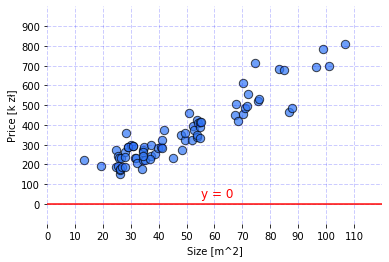

In [18]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy

# Load data from .csv
df_data = pd.read_csv("cracow_apartments.csv", sep=",")

# Used features and target value
features = ["size"]
target = ["price"]

# Slice Dataframe to separate feature vectors and target value
X, y = df_data[features].as_matrix(), df_data[target].as_matrix()

# Initialize model parameters
n = len(features)
model_parameters = init(n)

# Make prediction for every data sample
predictions = [predict(x, model_parameters) for x in X]

#matplotlib.rcParams.update({'font.size': 14})

plt.scatter(df_data["size"], df_data["price"],
            edgecolor='black', linewidth='1', s=70, alpha=0.7, c="#3176f7")
plt.plot(np.arange(0, 120, 0.1), [predict([x], model_parameters) for x in np.arange(0, 120, 0.1)], c="red")
plt.text(55, 36, "y = 0", color="red", fontsize=12)
plt.xlabel("Size [m^2]")
plt.ylabel("Price [k zł]")
plt.ylim(-100, 1000)
plt.xlim(0, 120)
plt.yticks(np.arange(0, 1000, 100))
plt.xticks(np.arange(0, 120, 10))
plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False);

NameError: name 'matplotlib' is not defined

### Coding Deep Learning for Beginners — Linear Regression (Part 2): Cost Function 

To simplify visualizations and make learning more efficient — only size feature will be used.

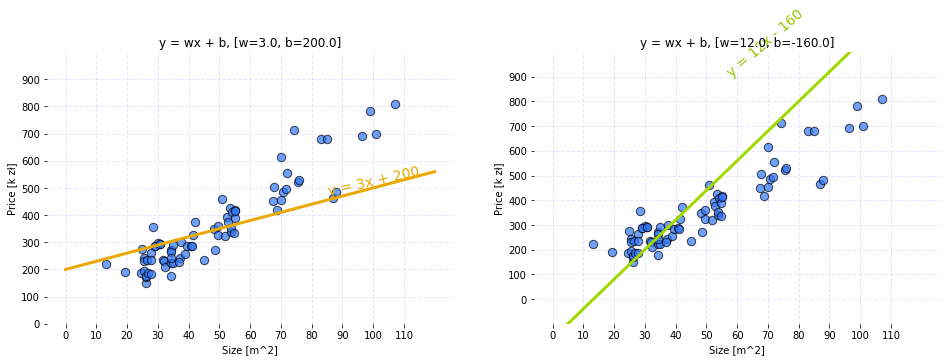

In [19]:
model_parameters_0 = {'b': 200, 'w': np.array([3.0])}
model_parameters_1 = {'b': -160, 'w': np.array([12.0])}

f, axarr = plt.subplots(1, 2, figsize=(16, 5))
axarr[0].scatter(df_data["size"], df_data["price"],
                 edgecolor='black', linewidth="1", s=70, alpha=0.7, c="#3176f7")
axarr[0].plot(np.arange(0, 120, 0.1), [predict([x], model_parameters_0) for x in np.arange(0, 120, 0.1)], 
              c="#eaa800", linewidth="3")
axarr[0].text(85, 474, "y = 3x + 200", color="#eaa800", fontsize=14, rotation=13)
axarr[0].set_title("y = wx + b, [w=3.0, b=200.0]")
axarr[0].set_xlabel("Size [m^2]")
axarr[0].set_ylabel("Price [k zł]")
axarr[0].set_ylim(0, 1000)
axarr[0].set_yticks(np.arange(0, 1000, 100))
axarr[0].set_xticks(np.arange(0, 120, 10))
axarr[0].grid(color='blue', linestyle='--', linewidth=1, alpha=0.1)
axarr[0].spines["top"].set_visible(False)
axarr[0].spines["right"].set_visible(False)
axarr[0].spines["bottom"].set_visible(False)
axarr[0].spines["left"].set_visible(False)

axarr[1].scatter(df_data["size"], df_data["price"],
                 edgecolor='black', linewidth="1", s=70, alpha=0.7, c="#3176f7")
axarr[1].plot(np.arange(0, 120, 0.1), [predict([x], model_parameters_1) for x in np.arange(0, 120, 0.1)], 
              c="#a2d800", linewidth="3")
axarr[1].text(56, 900, "y = 12x - 160", color="#95c600", fontsize=14, rotation=41)
axarr[1].set_title("y = wx + b, [w=12.0, b=-160.0]")
axarr[1].set_xlabel("Size [m^2]")
axarr[1].set_ylabel("Price [k zł]")
axarr[1].set_ylim(-100, 1000)
axarr[1].set_yticks(np.arange(0, 1000, 100))
axarr[1].set_xticks(np.arange(0, 120, 10))
axarr[1].grid(color='blue', linestyle='--', linewidth=1, alpha=0.1)
axarr[1].spines["top"].set_visible(False)
axarr[1].spines["right"].set_visible(False)
axarr[1].spines["bottom"].set_visible(False)
axarr[1].spines["left"].set_visible(False)

Cost function

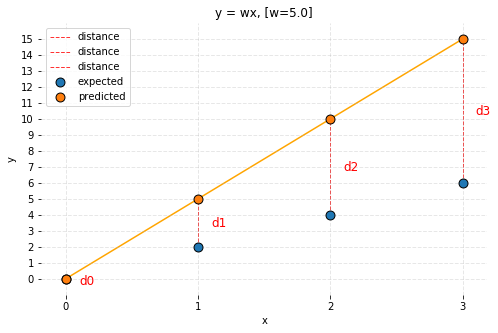

In [21]:
#Let's pick w=5.0
X = np.array([[0.0], [1.0], [2.0], [3.0]])
y = np.array([0.0, 2.0, 4.0, 6.0])

model_parameters = {'b': 0.0, 'w': np.array([5.0])}
y_predicted = [predict(x, model_parameters) for x in X]

plt.figure(figsize=(8, 5))
plt.yticks(np.arange(0, 16, 1))
plt.xticks(np.arange(0, 4, 1))
plt.ylabel("y")
plt.xlabel("x")
plt.ylim(-1, 16)
plt.grid("on", linestyle='--', linewidth=1, alpha=0.3)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.title("y = wx, [w=5.0]")

plt.scatter(X, y, edgecolor='black', linewidth=1, 
            label="expected", s=80, zorder=2)

plt.scatter(X, y_predicted, edgecolor='black', linewidth=1, 
            label="predicted", s=80, zorder=2)
plt.plot(X, y_predicted, zorder=1, c="orange")

plt.plot([1.0, 1.0], [2.0, 5.0], linewidth=1, linestyle="--", color="red", 
         label="distance", alpha=0.8, zorder=1)
plt.plot([2.0, 2.0], [4.0, 10.0], linewidth=1, linestyle="--", color="red", 
         label="distance", alpha=0.8, zorder=1)
plt.plot([3.0, 3.0], [6.0, 15.0], linewidth=1, linestyle="--", color="red", 
         label="distance", alpha=0.8, zorder=1)

plt.text(0.1, -0.35, "d0", color="red", fontsize=12)
plt.text(1.1, 3.25, "d1", color="red", fontsize=12)
plt.text(2.1, 6.75, "d2", color="red", fontsize=12)
plt.text(3.1, 10.25, "d3", color="red", fontsize=12)

plt.legend();

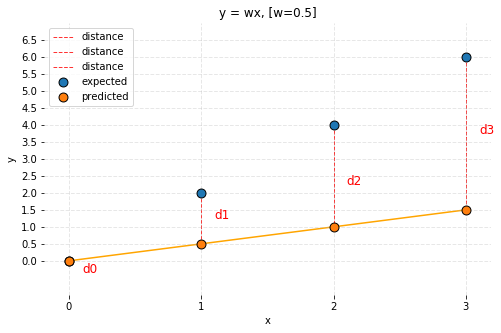

In [22]:
#Now let's w = 0.5

X = np.array([[0.0], [1.0], [2.0], [3.0]])
y = np.array([0.0, 2.0, 4.0, 6.0])

model_parameters = {'b': 0.0, 'w': np.array([0.5])}
y_predicted = [predict(x, model_parameters) for x in X]

plt.figure(figsize=(8, 5))
plt.yticks(np.arange(0, 7, 0.5))
plt.xticks(np.arange(0, 4, 1))
plt.ylabel("y")
plt.xlabel("x")
plt.ylim(-1, 7)
plt.grid("on", linestyle='--', linewidth=1, alpha=0.3)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.title("y = wx, [w=0.5]")

plt.scatter(X, y, edgecolor='black', linewidth=1, 
            label="expected", s=80, zorder=2)
plt.scatter(X, y_predicted, edgecolor='black', linewidth=1, 
            label="predicted", s=80, zorder=2)
plt.plot(X, y_predicted, zorder=1, c="orange")

plt.plot([1.0, 1.0], [2.0, 0.5], linewidth=1, linestyle="--", color="red", 
         label="distance", alpha=0.8, zorder=1)
plt.plot([2.0, 2.0], [4.0, 1.0], linewidth=1, linestyle="--", color="red", 
         label="distance", alpha=0.8, zorder=1)
plt.plot([3.0, 3.0], [6.0, 1.5], linewidth=1, linestyle="--", color="red", 
         label="distance", alpha=0.8, zorder=1)

plt.text(0.1, -0.35, "d0", color="red", fontsize=12)
plt.text(1.1, 1.25, "d1", color="red", fontsize=12)
plt.text(2.1, 2.25, "d2", color="red", fontsize=12)
plt.text(3.1, 3.75, "d3", color="red", fontsize=12)

plt.legend();

MSE.
Each partial error is equivalent to the area of the square created out of the geometrical distance between the measured points.
All region areas are summed up and averaged. 

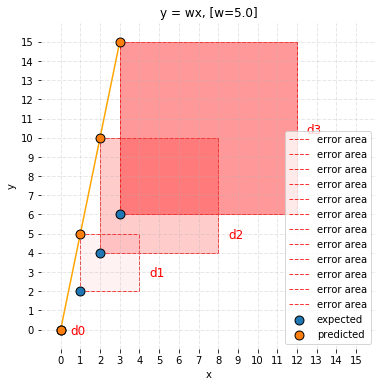

In [23]:
X = np.array([[0.0], [1.0], [2.0], [3.0]])
y = np.array([0.0, 2.0, 4.0, 6.0])

model_parameters = {'b': 0.0, 'w': np.array([5.0])}
y_predicted = [predict(x, model_parameters) for x in X]

plt.figure(figsize=(6, 6))
plt.yticks(np.arange(0, 16, 1))
plt.xticks(np.arange(0, 4, 1))
plt.ylabel("y")
plt.xlabel("x")
plt.ylim(-1, 16)
plt.xlim(-1, 16)
plt.xticks(np.arange(0, 16, 1))
plt.grid("on", linestyle='--', linewidth=1, alpha=0.3)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.title("y = wx, [w=5.0]")

plt.scatter(X, y, edgecolor='black', linewidth=1, 
            label="expected", s=80, zorder=2)

plt.scatter(X, y_predicted, edgecolor='black', linewidth=1, 
            label="predicted", s=80, zorder=2)
plt.plot(X, y_predicted, zorder=1, c="orange")

plt.plot([1.0, 1.0], [2.0, 5.0], linewidth=1, linestyle="--", color="red", 
         label="error area", alpha=0.8, zorder=1)
plt.plot([4.0, 4.0], [2.0, 5.0], linewidth=1, linestyle="--", color="red", 
         label="error area", alpha=0.8, zorder=1)
plt.plot([1.0, 4.0], [5.0, 5.0], linewidth=1, linestyle="--", color="red", 
         label="error area", alpha=0.8, zorder=1)
plt.plot([1.0, 4.0], [2.0, 2.0], linewidth=1, linestyle="--", color="red", 
         label="error area", alpha=0.8, zorder=1)
plt.fill([[1], [1], [4], [4]], [[2],[5],[5],[2]], alpha=0.05, color='red')

plt.plot([2.0, 2.0], [4.0, 10.0], linewidth=1, linestyle="--", color="red", 
         label="error area", alpha=0.8, zorder=1)
plt.plot([8.0, 8.0], [4.0, 10.0], linewidth=1, linestyle="--", color="red", 
         label="error area", alpha=0.8, zorder=1)
plt.plot([2.0, 8.0], [10.0, 10.0], linewidth=1, linestyle="--", color="red", 
         label="error area", alpha=0.8, zorder=1)
plt.plot([2.0, 8.0], [4.0, 4.0], linewidth=1, linestyle="--", color="red", 
         label="error area", alpha=0.8, zorder=1)
plt.fill([[2], [2], [8], [8]], [[4],[10],[10],[4]], alpha=0.2, color='red')


plt.plot([3.0, 3.0], [6.0, 15.0], linewidth=1, linestyle="--", color="red", 
         label="error area", alpha=0.8, zorder=1)
plt.plot([12.0, 12.0], [6.0, 15.0], linewidth=1, linestyle="--", color="red", 
         label="error area", alpha=0.8, zorder=1)
plt.plot([3.0, 12.0], [15.0, 15.0], linewidth=1, linestyle="--", color="red", 
         label="error area", alpha=0.8, zorder=1)
plt.plot([3.0, 12.0], [6.0, 6.0], linewidth=1, linestyle="--", color="red", 
         label="error area", alpha=0.8, zorder=1)
plt.fill([[3], [3], [12], [12]], [[6],[15],[15],[6]], alpha=0.4, color='red')

plt.text(0.5, -0.25, "d0", color="red", fontsize=12)
plt.text(4.5, 2.75, "d1", color="red", fontsize=12)
plt.text(8.5, 4.75, "d2", color="red", fontsize=12)
plt.text(12.5, 10.25, "d3", color="red", fontsize=12)

plt.legend();

In [25]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data from .csv
df_data = pd.read_csv("cracow_apartments.csv", sep=",")

# Used features and target value
features = ["size"]
target = ["price"]

# Slice Dataframe to separade feature vectors and target value
X, y = df_data[features].as_matrix(), df_data[target].as_matrix()

# Parameter sets
orange_parameters = {'b': 200, 'w': np.array([3.0])}
lime_parameters = {'b': -160, 'w': np.array([12.0])}

# Make prediction for every data sample
orange_pred = [predict(x, orange_parameters) for x in X]
lime_pred = [predict(x, lime_parameters) for x in X]

# Model error
mse_orange_error = mse(orange_pred, y)

c:\users\olya\envs\compvis_env\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


NameError: name 'mse' is not defined

In [27]:
from copy import deepcopy

def train(X, y, model_parameters, step=0.1, iterations=100):    
    # Make prediction for every data sample
    predictions = [predict(x, model_parameters) for x in X]

    # Calculate cost for model - MSE
    lowest_error = mse(predictions, y)
    
    print("\nInitial state:")
    print(" - error: {}".format(lowest_error))
    print(" - parameters: {}".format(model_parameters))
 
    for i in range(iterations):
        candidates, errors = list(), list()

        # w increased, b increased
        param_candidate = deepcopy(model_parameters)
        param_candidate["b"] += step
        param_candidate["w"] += step
        candidate_pred = [predict(x, param_candidate) for x in X]
        candidate_error = mse(candidate_pred, y)

        candidates.append(param_candidate)
        errors.append(candidate_error)

        # w increased, b unchanged
        param_candidate = deepcopy(model_parameters)
        param_candidate["w"] += step
        candidate_pred = [predict(x, param_candidate) for x in X]
        candidate_error = mse(candidate_pred, y)

        candidates.append(param_candidate)
        errors.append(candidate_error)

        # w increased, b decreased
        param_candidate = deepcopy(model_parameters)
        param_candidate["b"] -= step
        param_candidate["w"][0] += step
        candidate_pred = [predict(x, param_candidate) for x in X]
        candidate_error = mse(candidate_pred, y)

        candidates.append(param_candidate)
        errors.append(candidate_error)

        # w unchanged, b increased
        param_candidate = deepcopy(model_parameters)
        param_candidate["b"] += step
        candidate_pred = [predict(x, param_candidate) for x in X]
        candidate_error = mse(candidate_pred, y)

        candidates.append(param_candidate)
        errors.append(candidate_error)

        # w unchanged, b unchanged
        param_candidate = deepcopy(model_parameters)
        candidate_pred = [predict(x, param_candidate) for x in X]
        candidate_error = mse(candidate_pred, y)

        candidates.append(param_candidate)
        errors.append(candidate_error)

        # w unchanged, b decreased
        param_candidate = deepcopy(model_parameters)
        param_candidate["b"] -= step
        candidate_pred = [predict(x, param_candidate) for x in X]
        candidate_error = mse(candidate_pred, y)

        candidates.append(param_candidate)
        errors.append(candidate_error)

        # w decreased, b increased
        param_candidate = deepcopy(model_parameters)
        param_candidate["b"] += step
        param_candidate["w"] -= step
        candidate_pred = [predict(x, param_candidate) for x in X]
        candidate_error = mse(candidate_pred, y)

        candidates.append(param_candidate)
        errors.append(candidate_error)

        # w decreased, b unchanged
        param_candidate = deepcopy(model_parameters)
        param_candidate["w"] -= step
        candidate_pred = [predict(x, param_candidate) for x in X]
        candidate_error = mse(candidate_pred, y)

        candidates.append(param_candidate)
        errors.append(candidate_error)

        # w decreased, b decreased
        param_candidate = deepcopy(model_parameters)
        param_candidate["b"] -= step
        param_candidate["w"] -= step
        candidate_pred = [predict(x, param_candidate) for x in X]
        candidate_error = mse(candidate_pred, y)

        candidates.append(param_candidate)
        errors.append(candidate_error)

        # Update with parameters for which loss is smallest
        best_candidate = None
        for candidate, candidate_error in zip(candidates, errors):
            if candidate_error < lowest_error:
                lowest_error = candidate_error
                model_parameters["w"], model_parameters["b"] = candidate["w"], candidate["b"]
        
        # Display training progress every 20th iteration
        if i % 20 == 0:
            print("\nIteration {}:".format(i))
            print(" - error: {}".format(lowest_error))
            print(" - parameters: {}".format(model_parameters))
    
    print("\nFinal state:")
    print(" - error: {}".format(lowest_error))
    print(" - parameters: {}".format(model_parameters))

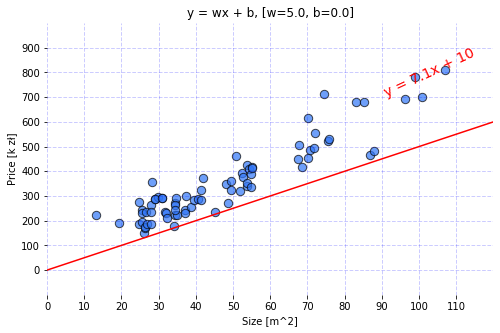

In [29]:
#matplotlib.rcParams.update({'font.size': 14})

plt.figure(figsize=(8, 5))
plt.scatter(df_data["size"], df_data["price"],
            edgecolor='black', linewidth='1', s=70, alpha=0.7, c="#3176f7")
plt.plot(np.arange(0, 120, 0.1), [predict([x], model_parameters) for x in np.arange(0, 120, 0.1)], c="red")
plt.text(90, 700, "y = 7.1x + 10", color="r", fontsize=14, rotation=25)
plt.xlabel("Size [m^2]")
plt.ylabel("Price [k zł]")
plt.ylim(-100, 1000)
plt.xlim(0, 120)
plt.title("y = wx + b, [w={:.1f}, b={:.1f}]".format(model_parameters["w"][0], model_parameters["b"]))
plt.yticks(np.arange(0, 1000, 100))
plt.xticks(np.arange(0, 120, 10))
plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False);